In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Импорт данных

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stat_logreg_exp.txt", sep='\t')

EXP - опыт работы программиста в месяцах; SUCCESS - успех выполнения сложного проекта

In [5]:
df

,EXP,SUCCESS
0,14,FAILURE
1,29,FAILURE
2,6,FAILURE
3,25,SUCCESS
...,...,...
21,4,FAILURE
22,28,SUCCESS
23,22,SUCCESS
24,8,SUCCESS


In [ ]:
c={'FAILURE':0, 'SUCCESS':1} # ручное кодирование
df['S01'] = df['SUCCESS'].map(c)

In [ ]:
df

,EXP,SUCCESS,S01
0,14,FAILURE,0
1,29,FAILURE,0
2,6,FAILURE,0
3,25,SUCCESS,1
...,...,...,...
21,4,FAILURE,0
22,28,SUCCESS,1
23,22,SUCCESS,1
24,8,SUCCESS,1


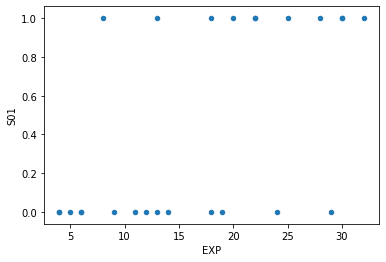

In [ ]:
df.plot('EXP','S01',kind="scatter")

In [ ]:
df.groupby('S01')[['EXP']].mean()

,EXP
S01,
0,12.428571
1,22.545455


In [ ]:
df_0 = df[df['S01']==0]
df_1 = df[df['S01']==1]
scipy.stats.mannwhitneyu(df_0['EXP'],df_1['EXP'])

MannwhitneyuResult(statistic=26.0, pvalue=0.002821696274844595)

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg = LogisticRegression()

In [ ]:
X=df[['EXP']]

In [ ]:
Y=df['S01']

In [ ]:
modelLR=LogReg.fit(X,Y)

In [ ]:
modelLR.intercept_

array([-1.41929614])

In [ ]:
modelLR.coef_

array([[0.08344285]])

Сигмоида
$$f(x)=\frac{e^{a+bx}}{1+e^{a+bx}}$$

In [ ]:
pred_LR=modelLR.predict(X)

In [ ]:
pred_LR

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [ ]:
probsLR = modelLR.predict_proba(X)
pred_p_LR = probsLR[:,1]

In [ ]:
probsLR

array([[0.5624463 , 0.4375537 ],
       [0.26883398, 0.73116602],
       [0.71476472, 0.28523528],
       [0.33921932, 0.66078068],
       [0.47934297, 0.52065703],
       [0.74753806, 0.25246194],
       [0.47934297, 0.52065703],
       [0.60300024, 0.39699976],
       [0.39736737, 0.60263263],
       [0.71476472, 0.28523528],
       [0.25275181, 0.74724819],
       [0.6227941 , 0.3772059 ],
       [0.25275181, 0.74724819],
       [0.73146771, 0.26853229],
       [0.43793159, 0.56206841],
       [0.5828634 , 0.4171366 ],
       [0.66112475, 0.33887525],
       [0.2225487 , 0.7774513 ],
       [0.3581662 , 0.6418338 ],
       [0.5828634 , 0.4171366 ],
       [0.45856574, 0.54143426],
       [0.74753806, 0.25246194],
       [0.28554841, 0.71445159],
       [0.39736737, 0.60263263],
       [0.67956062, 0.32043938]])

In [ ]:
PRED_LR=pd.DataFrame(pred_LR)
PROB_LR=pd.DataFrame(pred_p_LR)

In [ ]:
df_res=pd.concat([df,PROB_LR, PRED_LR],axis=1)

In [ ]:
df_res.set_axis(['EXP', 'SUCCESS', 'SO1', 'PROB_LR', 'PRED_LR'], axis=1)

In [ ]:
df_res

,EXP,SUCCESS,SO1,PROB_LR,PRED_LR
0,14,FAILURE,0,0.437554,0
1,29,FAILURE,0,0.731166,1
2,6,FAILURE,0,0.285235,0
3,25,SUCCESS,1,0.660781,1
...,...,...,...,...,...
21,4,FAILURE,0,0.252462,0
22,28,SUCCESS,1,0.714452,1
23,22,SUCCESS,1,0.602633,1
24,8,SUCCESS,1,0.320439,0


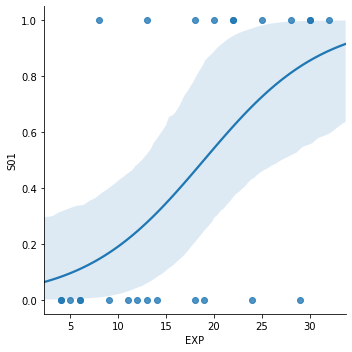

In [ ]:
sns.lmplot(x='EXP', y='S01', data=df, logistic=True)

## Оценка качества модели

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

Confusion matrix (Матрица неточностей)

In [ ]:
pd.DataFrame(confusion_matrix(Y, pred_LR))

,0,1
0,10,4
1,2,9


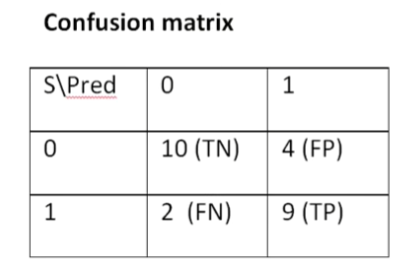

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y, pred_p_LR)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
threshold

array([1.7774513 , 0.7774513 , 0.74724819, 0.73116602, 0.66078068,
       0.6418338 , 0.60263263, 0.56206841, 0.54143426, 0.52065703,
       0.4375537 , 0.4171366 , 0.33887525, 0.32043938, 0.28523528,
       0.26853229, 0.25246194])

False Positive Rate
$$FPR=\frac{FP}{FP+TN} - (1 - специфичность)$$
True Positive Rate
$$TPR=\frac{TP}{TP+FN} - чувствительность$$

In [ ]:
roc_auc

0.8311688311688312

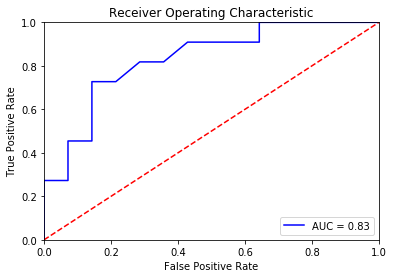

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Метрики качества

$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

$$Recall =\frac{TP}{TP+FN} - полнота  (=TPR)$$

$$Precision =\frac{TP}{TP+FP} - точность$$

$$F1\ score=2\cdot\frac{Precision \cdot Recall}{Precision+Recall}$$

$$F1\ score=(\beta^2+1)\cdot\frac{Precision \cdot Recall}{\beta^2 Precision+Recall}$$

$$ 0<\beta<1 - приоритет \  точности, \beta>1 - приоритет \ полноты$$ 


![](https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png)

In [ ]:
pd.DataFrame(data=[accuracy_score(Y, pred_LR), recall_score(Y, pred_LR),
                   precision_score(Y, pred_LR), f1_score(Y, pred_LR)], 
             index=["accuracy", "recall", "precision", "f1 score"])

,0
accuracy,0.760000
recall,0.818182
precision,0.692308
f1 score,0.750000


In [ ]:
threshold = 0.55
pred_055 = np.where(LogReg.predict_proba(X)[:,1] > threshold, 1, 0)

In [ ]:
pd.DataFrame(data=[accuracy_score(Y, pred_055), recall_score(Y, pred_055),
                   precision_score(Y, pred_055), f1_score(Y, pred_055)], 
             index=["accuracy", "recall", "precision", "f1 score"])

,0
accuracy,0.800000
recall,0.727273
precision,0.800000
f1 score,0.761905


In [ ]:
CM=pd.DataFrame(confusion_matrix(Y, pred_055))
CM

,0,1
0,12,2
1,3,8
